In [1]:
!pip install nltk fastDamerauLevenshtein Levenshtein seaborn matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached Levenshtein-0.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (177 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 735.1 kB/s eta 0:00:00m eta 0:00:010:00:01
  Created wheel for fastDamerauLevenshtein: filename=fastDamerauLevenshtein-1.0.7-cp310-cp310-linux_x86_64.whl size=53669 sha256=fc1c87903822b78e65de582e6b94d32931d1eee66b7aecd2c8e991f0d3d3222d
  Stored in directory: /home/klychliiev/.cache/pip/wheels/de/48/fe/3d80d282115f627c1dcf5764dac377793d2b028087ac461220
Successfully built fastDamerauLevenshtein


In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/klychliiev/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Кличлієв Кирило, група №2, Лабораторна робота №2
Тлумачення для 'love':
a strong positive emotion of regard and affection
any object of warm affection or devotion
a beloved person; used as terms of endearment
a deep feeling of sexual desire and attraction
a score of zero in tennis or squash
sexual activities (often including sexual intercourse) between two people
have a great affection or liking for
get pleasure from
be enamored or in love with
have sexual intercourse with

Тлумачення для 'leave':
the period of time during which you are absent from work or duty
permission to do something
the act of departing politely
go away from a place
go and leave behind, either intentionally or by neglect or forgetfulness
act or be so as to become in a specified state
leave unchanged or undisturbed or refrain from taking
move out of or depart from
make a possibility or provide opportunity for; permit to be attainable or cause to remain
have as a result or residue
remove oneself from an association 

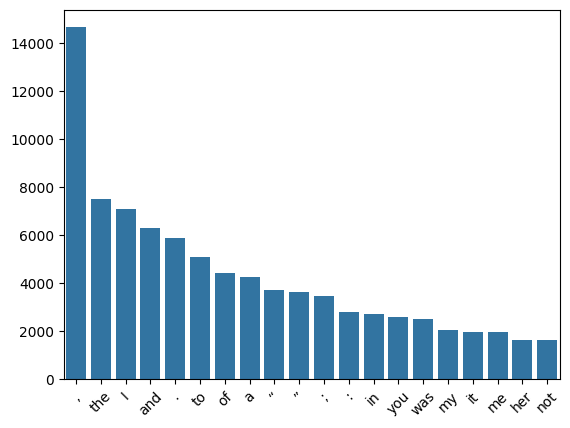


Найближчі слова до 'give' у новоствореному файлі: ['give', 'give—', 'gives', 'giver', 'given']


In [7]:
# Імпорт необхідних бібліотек
import nltk
from nltk.corpus import wordnet as wn
from Levenshtein import distance as levenshtein_distance
from fastDamerauLevenshtein import damerauLevenshtein
import difflib
import seaborn as sns
import matplotlib.pyplot as plt

# Виведення інформації про автора та лабораторну роботу
print("Кличлієв Кирило, група №2, Лабораторна робота №2")

# Визначення іменників для аналізу
noun1 = "love"
noun2 = "leave"

# Виведення тлумачень для всіх семантичних значень іменників
print(f"Тлумачення для '{noun1}':")
for synset in wn.synsets(noun1):
    print(synset.definition())

print(f"\nТлумачення для '{noun2}':")
for synset in wn.synsets(noun2):
    print(synset.definition())

# Виведення гіпонімів та гіперонімів для іменників
print(f"\nГіпоніми для '{noun1}':")
for hyponym in wn.synsets(noun1)[0].hyponyms():
    print(hyponym.lemma_names())

print(f"\nГіпероніми для '{noun1}':")
for hypernym in wn.synsets(noun1)[0].hypernyms():
    print(hypernym.lemma_names())

print(f"\nГіпоніми для '{noun2}':")
for hyponym in wn.synsets(noun2)[0].hyponyms():
    print(hyponym.lemma_names())

print(f"\nГіпероніми для '{noun2}':")
for hypernym in wn.synsets(noun2)[0].hypernyms():
    print(hypernym.lemma_names())

# Найнижчий у ієрархії понять спільний гіперонім
lowest_common_hypernym = wn.synsets(noun1)[0].lowest_common_hypernyms(wn.synsets(noun2)[0])
print(f"\nСпільний гіперонім для '{noun1}' і '{noun2}': {lowest_common_hypernym}")

# Семантична подібність іменників
path_similarity = wn.synsets(noun1)[0].path_similarity(wn.synsets(noun2)[0])
wup_similarity = wn.synsets(noun1)[0].wup_similarity(wn.synsets(noun2)[0])
lch_similarity = wn.synsets(noun1)[0].lch_similarity(wn.synsets(noun2)[0])

print(f"\nPath Distance Similarity між '{noun1}' і '{noun2}': {path_similarity}")
print(f"Wu-Palmer Similarity між '{noun1}' і '{noun2}': {wup_similarity}")
print(f"Leacock Chodorow Similarity між '{noun1}' і '{noun2}': {lch_similarity}")

# Відстань Левенштейна між іменниками
lev_distance = levenshtein_distance(noun1, noun2)
print(f"\nВідстань Левенштейна між '{noun1}' і '{noun2}': {lev_distance}")

# Відстань Дамерау-Левенштейна між іменниками
damerau_lev_distance = damerauLevenshtein(noun1, noun2)
print(f"Відстань Дамерау-Левенштейна між '{noun1}' і '{noun2}': {damerau_lev_distance}")

# Введення довільного слова користувачем та пошук найближчих слів
user_input = input("\nВведіть довільне слово англійською мовою: ")
closest_words = difflib.get_close_matches(user_input, wn.words(), n=5)
print(f"Найближчі слова до '{user_input}': {closest_words}")

# Обробка текстового файлу (Jane_Eyre.txt)
with open('Jane_Eyre.txt', 'r') as file:
    text = file.read()

# Токенізація слів
words = nltk.word_tokenize(text)
freq_dist = nltk.FreqDist(words)

# Візуалізація частотності використання слів
most_common_words = freq_dist.most_common(20)
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.show()

# Створення нового текстового файлу та збереження відсортованих слів
sorted_words = sorted(freq_dist.items(), key=lambda item: item[1], reverse=True)
with open('new_file.txt', 'w') as new_file:
    for word, frequency in sorted_words:
        new_file.write(f"{word}\n")

# Пошук найближчих слів до введеного користувачем слова у новоствореному файлі
closest_new_words = difflib.get_close_matches(user_input, [word for word, freq in sorted_words], n=5)
print(f"\nНайближчі слова до '{user_input}' у новоствореному файлі: {closest_new_words}")
